In [1]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyvis.network import Network

In [2]:
# FORMAT SEABORN

sns.set(color_codes=True)
# sns.set(rc={"figure.figsize":(12,9)})
sns.set(rc={"figure.figsize":(15,12)})
pd.set_option("display.max_rows", None)

In [3]:
# IMPORT DATAFRAME

df = pd.read_csv("raiden-datacollector-export.csv")

In [4]:
# EXPLORE DATAFRAME

# df.head(10)
# df.tail(10)
df.info()
# df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Block                        1092 non-null   int64  
 1   Event                        1092 non-null   object 
 2   Network_ID                   1092 non-null   object 
 3   Network_Type                 1092 non-null   object 
 4   Token_ID                     0 non-null      float64
 5   Channel_Amount               387 non-null    float64
 6   Participant_1_Settle_Amount  188 non-null    float64
 7   Participant_2_Settle_Amount  188 non-null    float64
 8   Channel_ID                   1092 non-null   int64  
 9   Transaction                  1092 non-null   object 
 10  Channel_Participant_1        904 non-null    object 
 11  Channel_Participant_2        305 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 102.5+ KB


In [5]:
# SET INDEX ON CHANNEL ID

df = df.set_index(["Channel_ID"])
# df

In [6]:
# ASSIGN EVENTS TO DISTINCT DATAFRAMES

df_raiden_opened = df[(df["Event"]== "ChannelOpened")]
df_raiden_closed = df[(df["Event"]== "ChannelClosed")]
df_raiden_settled = df[(df["Event"]== "ChannelSettled")]
df_raiden_deposit = df[(df["Event"]== "ChannelNewDeposit")]

In [7]:
# EXPLORE DATAFRAME OPENED CHANNELS

df_raiden_opened.head(10)
# df_raiden_opened.index
# df_raiden_opened.columns
# df_raiden_opened.info()
# df_raiden_opened

,Block,Event,Network_ID,Network_Type,Token_ID,Channel_Amount,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction,Channel_Participant_1,Channel_Participant_2
Channel_ID,,,,,,,,,,,
1,6580846,ChannelOpened,RDN,Mainnet,NaN,NaN,NaN,NaN,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36
2,6580854,ChannelOpened,RDN,Mainnet,NaN,NaN,NaN,NaN,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253
3,6581220,ChannelOpened,RDN,Mainnet,NaN,NaN,NaN,NaN,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253
4,6581220,ChannelOpened,RDN,Mainnet,NaN,NaN,NaN,NaN,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36
5,6581220,ChannelOpened,RDN,Mainnet,NaN,NaN,NaN,NaN,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF
6,6581597,ChannelOpened,RDN,Mainnet,NaN,NaN,NaN,NaN,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118
7,6581606,ChannelOpened,RDN,Mainnet,NaN,NaN,NaN,NaN,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118
8,6581624,ChannelOpened,RDN,Mainnet,NaN,NaN,NaN,NaN,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF
9,6581624,ChannelOpened,RDN,Mainnet,NaN,NaN,NaN,NaN,0x5dbb495720a8f9b979f256ad367fe38636ff1325ced5...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253


In [8]:
# DROP AND RENAME OPENED CHANNEL DATA

df_raiden_opened = df_raiden_opened.drop(columns=["Event", "Network_ID", "Network_Type", "Token_ID", "Channel_Amount", "Participant_1_Settle_Amount", "Participant_2_Settle_Amount"])
df_raiden_opened = df_raiden_opened.rename(columns={"Block": "Block_opened", "Transaction": "Transaction_opened"})
# df_raiden_opened

In [9]:
# EXPLORE DATAFRAME CLOSED CHANNELS

df_raiden_closed.head(10)
# df_raiden_closed.index
# df_raiden_closed.columns
# df_raiden_closed.info()
# df_raiden_closed

,Block,Event,Network_ID,Network_Type,Token_ID,Channel_Amount,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction,Channel_Participant_1,Channel_Participant_2
Channel_ID,,,,,,,,,,,
3,6581466,ChannelClosed,RDN,Mainnet,NaN,NaN,NaN,NaN,0x5210489901815d3720fdaf9c7c9e84a7fd12d57df53a...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,NaN
2,6583221,ChannelClosed,RDN,Mainnet,NaN,NaN,NaN,NaN,0x01af2bb2e02892067418b47593a0b5c8fdd724a91932...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN
6,6584834,ChannelClosed,RDN,Mainnet,NaN,NaN,NaN,NaN,0xf58a177d666ba9a48a1bada69a6d4bd6239b117a12a3...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,NaN
7,6593708,ChannelClosed,RDN,Mainnet,NaN,NaN,NaN,NaN,0x317558245613a1478c83be0d1cc27936acb7d225534a...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,NaN
1,6593710,ChannelClosed,RDN,Mainnet,NaN,NaN,NaN,NaN,0xe16a6eef9584de3cdab902899be1fe21af806bfce8b7...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN
8,6593710,ChannelClosed,RDN,Mainnet,NaN,NaN,NaN,NaN,0x4a2186fe6b873aacb2ef94452e8ad323cc7e13691bcd...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,NaN
4,6593711,ChannelClosed,RDN,Mainnet,NaN,NaN,NaN,NaN,0xd168064268a1f21c33218da62d05f661b9e91e81cb2d...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN
9,6593711,ChannelClosed,RDN,Mainnet,NaN,NaN,NaN,NaN,0x5cd2466a698f78150336f570d5b026cbc211792b4fff...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,NaN
11,6593713,ChannelClosed,RDN,Mainnet,NaN,NaN,NaN,NaN,0x0e5b85385554df5bbddfadc996a0b51a41547828c159...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,NaN


In [10]:
# DROP AND RENAME CLOSED CHANNEL DATA

df_raiden_closed = df_raiden_closed.drop(columns=["Event", "Network_ID", "Network_Type", "Token_ID", "Channel_Amount", "Participant_1_Settle_Amount", "Participant_2_Settle_Amount", "Channel_Participant_2"])
df_raiden_closed = df_raiden_closed.rename(columns={"Block": "Block_closed", "Transaction": "Transaction_closed", "Channel_Participant_1": "Participant_closed"})
# df_raiden_closed

In [11]:
# EXPLORE DATAFRAME SETTLED CHANNELS

df_raiden_settled.head(10)
# df_raiden_settled.index
# df_raiden_settled.columns
# df_raiden_setlled.info()
# df_raiden_settled

,Block,Event,Network_ID,Network_Type,Token_ID,Channel_Amount,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction,Channel_Participant_1,Channel_Participant_2
Channel_ID,,,,,,,,,,,
3,6581983,ChannelSettled,RDN,Mainnet,NaN,NaN,3.000000e+00,9.000000e+00,0xc512245ccf7b5ed88d534576bd3346711d5ef063cabb...,NaN,NaN
2,6583743,ChannelSettled,RDN,Mainnet,NaN,NaN,1.888989e+16,1.078010e+16,0xd84923345d90eca2eddd0b3d29bdb6edb13547412585...,NaN,NaN
6,6586554,ChannelSettled,RDN,Mainnet,NaN,NaN,0.000000e+00,5.000000e+16,0x83ef306bbd0c21e6a98135df35f4255c484280eae75c...,NaN,NaN
7,6594222,ChannelSettled,RDN,Mainnet,NaN,NaN,1.000000e+15,0.000000e+00,0xf10d269c20023e5ae968a91eca082a05aa1f3ab2d61d...,NaN,NaN
1,6594222,ChannelSettled,RDN,Mainnet,NaN,NaN,1.989000e+16,0.000000e+00,0x52dc88c79ea6fddd907765fae0dfc4e947189c6d6008...,NaN,NaN
14,6594243,ChannelSettled,RDN,Mainnet,NaN,NaN,7.500000e+15,0.000000e+00,0x7ee5b123dad71e663527256673c9d752b4373f24f765...,NaN,NaN
17,6594243,ChannelSettled,RDN,Mainnet,NaN,NaN,7.500000e+15,0.000000e+00,0x5567d91018853e7a037fbf068b5ba1bb57074a293cc0...,NaN,NaN
19,6594243,ChannelSettled,RDN,Mainnet,NaN,NaN,7.500000e+15,0.000000e+00,0x494c23e804059c4e529500e62d6be8d31698c6fa5eaf...,NaN,NaN
27,6594243,ChannelSettled,RDN,Mainnet,NaN,NaN,7.500000e+15,0.000000e+00,0x3009a8aab1cb63a963c7a640adf2942cf8985e18468a...,NaN,NaN


In [12]:
# DROP AND RENAME SETTLED CHANNEL DATA

df_raiden_settled = df_raiden_settled.drop(columns=["Event", "Network_ID", "Network_Type", "Token_ID", "Channel_Amount", "Channel_Participant_1", "Channel_Participant_2"])
df_raiden_settled = df_raiden_settled.rename(columns={"Block": "Block_settled", "Transaction": "Transaction_settled"})
df_raiden_settled

,Block_settled,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction_settled
Channel_ID,,,,
3,6581983,3.000000e+00,9.000000e+00,0xc512245ccf7b5ed88d534576bd3346711d5ef063cabb...
2,6583743,1.888989e+16,1.078010e+16,0xd84923345d90eca2eddd0b3d29bdb6edb13547412585...
6,6586554,0.000000e+00,5.000000e+16,0x83ef306bbd0c21e6a98135df35f4255c484280eae75c...
7,6594222,1.000000e+15,0.000000e+00,0xf10d269c20023e5ae968a91eca082a05aa1f3ab2d61d...
1,6594222,1.989000e+16,0.000000e+00,0x52dc88c79ea6fddd907765fae0dfc4e947189c6d6008...
14,6594243,7.500000e+15,0.000000e+00,0x7ee5b123dad71e663527256673c9d752b4373f24f765...
17,6594243,7.500000e+15,0.000000e+00,0x5567d91018853e7a037fbf068b5ba1bb57074a293cc0...
19,6594243,7.500000e+15,0.000000e+00,0x494c23e804059c4e529500e62d6be8d31698c6fa5eaf...
27,6594243,7.500000e+15,0.000000e+00,0x3009a8aab1cb63a963c7a640adf2942cf8985e18468a...


In [13]:
# EXPLORE DATAFRAME SETTLED CHANNELS

df_raiden_deposit.head(10)
# df_raiden_deposit.index
# df_raiden_deposit.columns
# df_raiden_deposit.info()
# df_raiden_deposit

,Block,Event,Network_ID,Network_Type,Token_ID,Channel_Amount,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction,Channel_Participant_1,Channel_Participant_2
Channel_ID,,,,,,,,,,,
1,6580878,ChannelNewDeposit,RDN,Mainnet,NaN,1.000000e+16,NaN,NaN,0xc114d9cffc2ca160e01e5704c96dd4d85963d2050883...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN
2,6580892,ChannelNewDeposit,RDN,Mainnet,NaN,2.000000e+16,NaN,NaN,0x2f8236ef21c02f38faf69f5568a27a1a86b7d1b18229...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,NaN
1,6580892,ChannelNewDeposit,RDN,Mainnet,NaN,1.000000e+16,NaN,NaN,0x5a216d189587ea693febcd860362025bfff49ccd412b...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN
2,6580899,ChannelNewDeposit,RDN,Mainnet,NaN,1.000000e+16,NaN,NaN,0x301a0a70290c41ab09bf77684e1e3f535bd2ca903c6f...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN
3,6581240,ChannelNewDeposit,RDN,Mainnet,NaN,2.000000e+01,NaN,NaN,0xed344936f64db7fb8df42bd492366b82ef0e3fe27ec9...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,NaN
4,6581280,ChannelNewDeposit,RDN,Mainnet,NaN,2.000000e+01,NaN,NaN,0x22e1cf696fd9a40ccfc340fea439b1c96dd4807076f2...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,NaN
5,6581328,ChannelNewDeposit,RDN,Mainnet,NaN,2.000000e+01,NaN,NaN,0x022ccaa676517e04be7433ed7ae147a6cf2d5f43a626...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,NaN
4,6581328,ChannelNewDeposit,RDN,Mainnet,NaN,5.000000e+15,NaN,NaN,0x0941bfe5a0d6c821724d4538a2f9497d8aaceb848ddf...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN
4,6581547,ChannelNewDeposit,RDN,Mainnet,NaN,1.200000e+02,NaN,NaN,0x6212250680af92eb0e05ca891e45bf81474024e38fa5...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,NaN


In [14]:
# DROP AND RENAME DEPOSITED CHANNEL DATA

df_raiden_deposit = df_raiden_deposit.drop(columns=["Event", "Network_ID", "Network_Type", "Token_ID", "Participant_1_Settle_Amount", "Participant_2_Settle_Amount", "Channel_Participant_2"])
df_raiden_deposit = df_raiden_deposit.rename(columns={"Block": "Block_deposited", "Transaction": "Transaction_deposited", "Channel_Participant_1": "Participant_deposited"})
# df_raiden_deposit

In [15]:
# MAPPING BOTH PARTICIPANTS TO CHANNEL ID

df_raiden_deposit_tempframe = df_raiden_deposit.groupby("Channel_ID").Participant_deposited.agg(["min", "max"])

#df_raiden_deposit_tempframe.describe()
df_raiden_deposit_tempframe.head(10)
# df_raiden_deposit_tempframe

,min,max
Channel_ID,,
1,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,0xf2fBCC167cc3f24a620798E27b4BB084dD275253
2,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253
3,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118
4,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36
5,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118
6,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617
7,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1
8,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF
9,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253


In [16]:
# SUM OF ALL DEPOSITS TO CHANNEL ID

df_raiden_deposit_sum = df_raiden_deposit.groupby("Channel_ID").Channel_Amount.agg(["sum"])

# df_raiden_deposit_sum.describe()
df_raiden_deposit_sum.head(10)
# df_raiden_deposit_sum

,sum
Channel_ID,
1,2.000000e+16
2,3.000000e+16
3,2.000000e+01
4,5.000000e+15
5,1.000000e+15
6,5.000000e+16
7,1.000000e+15
8,1.100000e+15
9,1.200000e+15


In [17]:
# COUNT OF ALL DEPOSITS FOR CHANNEL ID

df_raiden_deposit_count = df_raiden_deposit.groupby("Channel_ID").Channel_Amount.agg(["count"])

# df_raiden_deposit_count.describe
df_raiden_deposit_count.head(10)
# df_raiden_deposit_count

,count
Channel_ID,
1,2
2,2
3,1
4,3
5,2
6,1
7,1
8,2
9,2


In [18]:
# MERGE CHANNEL SUM TO CHANNEL ID

df_raiden_deposit_tempframe = df_raiden_deposit_tempframe.join(df_raiden_deposit_sum)
df_raiden_deposit_tempframe.head(10)
# df_raiden_deposit_tempframe

,min,max,sum
Channel_ID,,,
1,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,2.000000e+16
2,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,3.000000e+16
3,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,2.000000e+01
4,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,5.000000e+15
5,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,1.000000e+15
6,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,5.000000e+16
7,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,1.000000e+15
8,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.100000e+15
9,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,1.200000e+15


In [19]:
# MERGE CHANNEL DEPOSIT COUNT TO CHANNEL ID

df_raiden_deposit_tempframe = df_raiden_deposit_tempframe.join(df_raiden_deposit_count)
df_raiden_deposit_tempframe.head(10)
# df_raiden_deposit_tempframe

,min,max,sum,count
Channel_ID,,,,
1,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,2.000000e+16,2
2,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,3.000000e+16,2
3,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,2.000000e+01,1
4,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,5.000000e+15,3
5,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,1.000000e+15,2
6,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,5.000000e+16,1
7,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,1.000000e+15,1
8,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.100000e+15,2
9,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,1.200000e+15,2


In [20]:
# RENAME RAIDEN DEPOSIT FRAME

df_raiden_deposit_tempframe = df_raiden_deposit_tempframe.rename(columns={"min": "Deposit_Participant_A", "max": "Deposit_Participant_B", "sum": "Channel_Amount", "count": "Number_of_Deposits"})
df_raiden_deposit_tempframe.head(10)
# df_raiden_deposit_tempframe

,Deposit_Participant_A,Deposit_Participant_B,Channel_Amount,Number_of_Deposits
Channel_ID,,,,
1,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,2.000000e+16,2
2,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,3.000000e+16,2
3,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,2.000000e+01,1
4,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,5.000000e+15,3
5,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,1.000000e+15,2
6,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,5.000000e+16,1
7,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,1.000000e+15,1
8,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.100000e+15,2
9,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,1.200000e+15,2


In [21]:
# MERGE CHANNEL DATASETS (OPENED + CLOSED)

df_raiden_all = pd.merge(df_raiden_opened, df_raiden_closed, how="outer", on="Channel_ID", suffixes=("_opened", "_closed"))
df_raiden_all.head(10)
# df_raiden_all

,Block_opened,Transaction_opened,Channel_Participant_1,Channel_Participant_2,Block_closed,Transaction_closed,Participant_closed
Channel_ID,,,,,,,
1,6580846,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593710.0,0xe16a6eef9584de3cdab902899be1fe21af806bfce8b7...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36
2,6580854,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583221.0,0x01af2bb2e02892067418b47593a0b5c8fdd724a91932...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253
3,6581220,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6581466.0,0x5210489901815d3720fdaf9c7c9e84a7fd12d57df53a...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118
4,6581220,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593711.0,0xd168064268a1f21c33218da62d05f661b9e91e81cb2d...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36
5,6581220,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6595266.0,0x88bb1c14bf9c5f5375747a8a91e7bccd7fe71335a433...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF
6,6581597,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6584834.0,0xf58a177d666ba9a48a1bada69a6d4bd6239b117a12a3...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617
7,6581606,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6593708.0,0x317558245613a1478c83be0d1cc27936acb7d225534a...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1
8,6581624,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6593710.0,0x4a2186fe6b873aacb2ef94452e8ad323cc7e13691bcd...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1
9,6581624,0x5dbb495720a8f9b979f256ad367fe38636ff1325ced5...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6593711.0,0x5cd2466a698f78150336f570d5b026cbc211792b4fff...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1


In [22]:
# MERGE CHANNEL DATASETS (+ SETTLED)

df_raiden_all = pd.merge(df_raiden_all, df_raiden_settled, how="outer", on="Channel_ID", suffixes=("_all", "_settled"))
df_raiden_all.head(10)
# df_raiden_all

,Block_opened,Transaction_opened,Channel_Participant_1,Channel_Participant_2,Block_closed,Transaction_closed,Participant_closed,Block_settled,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction_settled
Channel_ID,,,,,,,,,,,
1,6580846,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593710.0,0xe16a6eef9584de3cdab902899be1fe21af806bfce8b7...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594222.0,1.989000e+16,0.000000e+00,0x52dc88c79ea6fddd907765fae0dfc4e947189c6d6008...
2,6580854,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583221.0,0x01af2bb2e02892067418b47593a0b5c8fdd724a91932...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583743.0,1.888989e+16,1.078010e+16,0xd84923345d90eca2eddd0b3d29bdb6edb13547412585...
3,6581220,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6581466.0,0x5210489901815d3720fdaf9c7c9e84a7fd12d57df53a...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6581983.0,3.000000e+00,9.000000e+00,0xc512245ccf7b5ed88d534576bd3346711d5ef063cabb...
4,6581220,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593711.0,0xd168064268a1f21c33218da62d05f661b9e91e81cb2d...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594251.0,5.000000e+15,0.000000e+00,0xa31468bf685360eebe89d47e0c29ad3e20072d9dde8b...
5,6581220,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6595266.0,0x88bb1c14bf9c5f5375747a8a91e7bccd7fe71335a433...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6598516.0,2.000000e+01,1.000000e+15,0x84e4099fe6b3b38a8f00dfe3d2bc582bd7b2852f2d54...
6,6581597,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6584834.0,0xf58a177d666ba9a48a1bada69a6d4bd6239b117a12a3...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,6586554.0,0.000000e+00,5.000000e+16,0x83ef306bbd0c21e6a98135df35f4255c484280eae75c...
7,6581606,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6593708.0,0x317558245613a1478c83be0d1cc27936acb7d225534a...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594222.0,1.000000e+15,0.000000e+00,0xf10d269c20023e5ae968a91eca082a05aa1f3ab2d61d...
8,6581624,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6593710.0,0x4a2186fe6b873aacb2ef94452e8ad323cc7e13691bcd...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594243.0,1.000000e+15,1.000000e+14,0xbcace76488f3d307bb383a069c607e58311e8a3dc8bb...
9,6581624,0x5dbb495720a8f9b979f256ad367fe38636ff1325ced5...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6593711.0,0x5cd2466a698f78150336f570d5b026cbc211792b4fff...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594251.0,1.000000e+15,2.000000e+14,0x5dd1afb55e85debb6518b7df425b733567df9dcf0c99...


In [23]:
# MERGE CHANNEL DATASETS (+ DEPOSITED)

df_raiden_all = df_raiden_all.join(df_raiden_deposit_tempframe)
df_raiden_all.head(10)
# df_raiden_all

,Block_opened,Transaction_opened,Channel_Participant_1,Channel_Participant_2,Block_closed,Transaction_closed,Participant_closed,Block_settled,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction_settled,Deposit_Participant_A,Deposit_Participant_B,Channel_Amount,Number_of_Deposits
Channel_ID,,,,,,,,,,,,,,,
1,6580846,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593710.0,0xe16a6eef9584de3cdab902899be1fe21af806bfce8b7...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594222.0,1.989000e+16,0.000000e+00,0x52dc88c79ea6fddd907765fae0dfc4e947189c6d6008...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,2.000000e+16,2.0
2,6580854,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583221.0,0x01af2bb2e02892067418b47593a0b5c8fdd724a91932...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583743.0,1.888989e+16,1.078010e+16,0xd84923345d90eca2eddd0b3d29bdb6edb13547412585...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,3.000000e+16,2.0
3,6581220,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6581466.0,0x5210489901815d3720fdaf9c7c9e84a7fd12d57df53a...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6581983.0,3.000000e+00,9.000000e+00,0xc512245ccf7b5ed88d534576bd3346711d5ef063cabb...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,2.000000e+01,1.0
4,6581220,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593711.0,0xd168064268a1f21c33218da62d05f661b9e91e81cb2d...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594251.0,5.000000e+15,0.000000e+00,0xa31468bf685360eebe89d47e0c29ad3e20072d9dde8b...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,5.000000e+15,3.0
5,6581220,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6595266.0,0x88bb1c14bf9c5f5375747a8a91e7bccd7fe71335a433...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6598516.0,2.000000e+01,1.000000e+15,0x84e4099fe6b3b38a8f00dfe3d2bc582bd7b2852f2d54...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,1.000000e+15,2.0
6,6581597,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6584834.0,0xf58a177d666ba9a48a1bada69a6d4bd6239b117a12a3...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,6586554.0,0.000000e+00,5.000000e+16,0x83ef306bbd0c21e6a98135df35f4255c484280eae75c...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,5.000000e+16,1.0
7,6581606,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6593708.0,0x317558245613a1478c83be0d1cc27936acb7d225534a...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594222.0,1.000000e+15,0.000000e+00,0xf10d269c20023e5ae968a91eca082a05aa1f3ab2d61d...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,1.000000e+15,1.0
8,6581624,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6593710.0,0x4a2186fe6b873aacb2ef94452e8ad323cc7e13691bcd...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594243.0,1.000000e+15,1.000000e+14,0xbcace76488f3d307bb383a069c607e58311e8a3dc8bb...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.100000e+15,2.0
9,6581624,0x5dbb495720a8f9b979f256ad367fe38636ff1325ced5...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6593711.0,0x5cd2466a698f7815

In [24]:
# MAKE NaN INCLUDING COLUMNS INT. PROBLEM: NaN INCLUDING COLUMNS ARE ALWAYS FLOAT IN NUMPY. LEAVE IT. :(

# df_raiden_all["Block_closed"].fillna(-1, inplace=True)
# df_raiden_all = df_raiden_all.astype({"Block_closed": "int64"})
# df_raiden_all["Block_settled"].fillna(-1, inplace=True)
# df_raiden_all = df_raiden_all.astype({"Block_settled": "int64"})
# df_raiden_all["Number_of_Deposits"].fillna(-1, inplace=True)
# df_raiden_all = df_raiden_all.astype({"Number_of_Deposits": "int64"})
# df_raiden_all

In [25]:
# COPY THE DATAFRAME TO NOT DESTROY THE NaN THROUGH GROUPING; BUGFIX

df_raiden_all_copy = df_raiden_all.copy()

In [26]:
# TAKE A LOOK AT ALL UNIQUE VALUES

df_raiden_all_copy.nunique()

Block_opened                   276
Transaction_opened             305
Channel_Participant_1           69
Channel_Participant_2           72
Block_closed                   133
Transaction_closed             212
Participant_closed              47
Block_settled                  136
Participant_1_Settle_Amount     74
Participant_2_Settle_Amount     71
Transaction_settled            188
Deposit_Participant_A           66
Deposit_Participant_B           65
Channel_Amount                  98
Number_of_Deposits               5
dtype: int64

In [27]:
# COUNT ALL INSTANCES

df_raiden_all_copy["Channel_Participant_1"].value_counts()
# df_raiden_all_copy["Channel_Participant_2"].value_counts()
# df_raiden_all_copy["Participant_1_Settle_Amount"].value_counts()
# df_raiden_all_copy["Participant_2_Settle_Amount"].value_counts()
# df_raiden_all_copy["Channel_Amount"].value_counts()
# df_raiden_all_copy["Number_of_Deposits"].value_counts()

0x4D439D7cdE5Fe95528b55b49f94526B584274d86    25
0x9bD7D8a082949c038F3186ac7639A52CA945f7ec    15
0x362708Dd5e81A85e75E877dF718A0A9eF35e8267    12
0xf2fBCC167cc3f24a620798E27b4BB084dD275253    12
0x46Bc840A680b7DeA672A3f976379EAC1D837994b    12
0xB2C94bBaf307C6DfBf70Cc2537385553385a345b    11
0x06f5140A415f4E3969f7e40daEcCFd0558c9cE26    11
0xD6e68536eCe0Eac02b39317FdCE814087Bae6118    11
0xE03E70e33F2AC48ceC3be5C0C7B06a0f25Ad5610    10
0xe89Ce3756690Ac7937972797471d7c84F9818ac6     9
0xf0DAca3B7Cb562059D89bD5d8291a482b20f9D52     9
0x7890D9F1919f6F2725c764386B96b9DCEC95DA5e     8
0xf9ED3cCa3e56A7B72049e6e830C39fd842A2F8e6     8
0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1     7
0x865b332B0B058C472Ee3B46C5a66b8D1699740E1     6
0x10F4BC8CD156B4785f8F1f100C53C4cA0181E9b9     6
0x37dd16822C4e9400788388911299B2b9571941ae     6
0x4252ccc23552bf3D3eeDFAB8e286815831479bDa     5
0x223Fd1E3662936D3607DCbf39c136779C78f3674     5
0x6a7b31479Bff6cE4d01ea6BCf2E7ca458e0B40d1     5
0x28898A6b762d9c400F

In [28]:
# TAKE A LOOK AT CHANNEL PARTICIPANTS

df_raiden_all_copy.groupby("Channel_Participant_1").nunique()
# df_raiden_all_copy.groupby("Channel_Participant_2").nunique()

,Block_opened,Transaction_opened,Channel_Participant_1,Channel_Participant_2,Block_closed,Transaction_closed,Participant_closed,Block_settled,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction_settled,Deposit_Participant_A,Deposit_Participant_B,Channel_Amount,Number_of_Deposits
Channel_Participant_1,,,,,,,,,,,,,,,
0x00808a9250F145e5fD8FEBD1ba804aAA8cAE649b,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
0x01563cEdFE39cEE8db2AA24DfF457244572f3258,3,3,1,3,1,0,0,1,1,1,0,1,1,2,2
0x06f5140A415f4E3969f7e40daEcCFd0558c9cE26,10,11,1,9,6,8,4,8,4,4,7,1,5,3,2
0x07DCFC1e9806AEc1983D58e09EC41cb63f51deCD,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1
0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,5,7,1,7,5,7,1,7,3,4,7,1,4,5,3
0x10F4BC8CD156B4785f8F1f100C53C4cA0181E9b9,4,6,1,5,5,6,3,6,3,2,6,1,3,3,3
0x223Fd1E3662936D3607DCbf39c136779C78f3674,5,5,1,5,1,0,0,1,1,1,0,1,2,2,2
0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,4,5,1,5,5,5,5,5,4,4,5,1,2,2,2
0x2A7D58e62C829b0321563A6D1dDd7c209eE657C3,3,3,1,3,2,3,2,3,2,3,2,1,1,2,2


In [29]:
# TAKE A LOOK AT CHANNEL PARTICIPANTS, 1, COUNT ALL

df_raiden_all_copy.groupby("Channel_Participant_1").count().max()
# df_raiden_all_copy.groupby("Channel_Participant_1").count().mean()
# df_raiden_all_copy.groupby("Channel_Participant_1").count().median()

Block_opened                   25
Transaction_opened             25
Channel_Participant_2          25
Block_closed                   25
Transaction_closed             15
Participant_closed             15
Block_settled                  25
Participant_1_Settle_Amount    25
Participant_2_Settle_Amount    25
Transaction_settled            15
Deposit_Participant_A          21
Deposit_Participant_B          21
Channel_Amount                 25
Number_of_Deposits             25
dtype: int64

In [30]:
# TAKE A LOOK AT CHANNEL PARTICIPANTS, 1, COUNT UNIQUE

df_raiden_all_copy.groupby("Channel_Participant_1").nunique().max()
# df_raiden_all_copy.groupby("Channel_Participant_1").nunique().mean()
# df_raiden_all_copy.groupby("Channel_Participant_1").nunique().median()

Block_opened                   25
Transaction_opened             25
Channel_Participant_1           1
Channel_Participant_2          24
Block_closed                   11
Transaction_closed             15
Participant_closed              6
Block_settled                  11
Participant_1_Settle_Amount    12
Participant_2_Settle_Amount    12
Transaction_settled            15
Deposit_Participant_A           9
Deposit_Participant_B           5
Channel_Amount                 12
Number_of_Deposits              4
dtype: int64

In [31]:
# TAKE A LOOK AT CHANNEL PARTICIPANTS, 2, COUNT ALL

df_raiden_all_copy.groupby("Channel_Participant_2").count().max()
# df_raiden_all_copy.groupby("Channel_Participant_2").count().mean()
# df_raiden_all_copy.groupby("Channel_Participant_2").count().median()

Block_opened                   19
Transaction_opened             19
Channel_Participant_1          19
Block_closed                   19
Transaction_closed             19
Participant_closed             19
Block_settled                  19
Participant_1_Settle_Amount    19
Participant_2_Settle_Amount    19
Transaction_settled            16
Deposit_Participant_A          17
Deposit_Participant_B          17
Channel_Amount                 19
Number_of_Deposits             19
dtype: int64

In [32]:
# TAKE A LOOK AT CHANNEL PARTICIPANTS, 2, COUNT UNIQUE

df_raiden_all_copy.groupby("Channel_Participant_2").nunique().max()
# df_raiden_all_copy.groupby("Channel_Participant_2").nunique().mean()
# df_raiden_all_copy.groupby("Channel_Participant_2").nunique().median()

Block_opened                   18
Transaction_opened             19
Channel_Participant_1          15
Channel_Participant_2           1
Block_closed                   17
Transaction_closed             19
Participant_closed             14
Block_settled                  15
Participant_1_Settle_Amount    14
Participant_2_Settle_Amount    10
Transaction_settled            16
Deposit_Participant_A          12
Deposit_Participant_B          14
Channel_Amount                 14
Number_of_Deposits              6
dtype: int64

In [33]:
# TAKE A LOOK AT CHANNEL SIZES, COUNT ALL

df_raiden_all_copy.groupby("Channel_Amount").count().max()
# df_raiden_all_copy.groupby("Channel_Amount").count().mean()
# df_raiden_all_copy.groupby("Channel_Amount").count().median()

# df_raiden_all.info()
df_raiden_all

,Block_opened,Transaction_opened,Channel_Participant_1,Channel_Participant_2,Block_closed,Transaction_closed,Participant_closed,Block_settled,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction_settled,Deposit_Participant_A,Deposit_Participant_B,Channel_Amount,Number_of_Deposits
Channel_ID,,,,,,,,,,,,,,,
1,6580846,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593710.0,0xe16a6eef9584de3cdab902899be1fe21af806bfce8b7...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594222.0,1.989000e+16,0.000000e+00,0x52dc88c79ea6fddd907765fae0dfc4e947189c6d6008...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,2.000000e+16,2.0
2,6580854,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583221.0,0x01af2bb2e02892067418b47593a0b5c8fdd724a91932...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583743.0,1.888989e+16,1.078010e+16,0xd84923345d90eca2eddd0b3d29bdb6edb13547412585...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,3.000000e+16,2.0
3,6581220,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6581466.0,0x5210489901815d3720fdaf9c7c9e84a7fd12d57df53a...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6581983.0,3.000000e+00,9.000000e+00,0xc512245ccf7b5ed88d534576bd3346711d5ef063cabb...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,2.000000e+01,1.0
4,6581220,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593711.0,0xd168064268a1f21c33218da62d05f661b9e91e81cb2d...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594251.0,5.000000e+15,0.000000e+00,0xa31468bf685360eebe89d47e0c29ad3e20072d9dde8b...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,5.000000e+15,3.0
5,6581220,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6595266.0,0x88bb1c14bf9c5f5375747a8a91e7bccd7fe71335a433...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6598516.0,2.000000e+01,1.000000e+15,0x84e4099fe6b3b38a8f00dfe3d2bc582bd7b2852f2d54...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,1.000000e+15,2.0
6,6581597,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6584834.0,0xf58a177d666ba9a48a1bada69a6d4bd6239b117a12a3...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,6586554.0,0.000000e+00,5.000000e+16,0x83ef306bbd0c21e6a98135df35f4255c484280eae75c...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,5.000000e+16,1.0
7,6581606,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6593708.0,0x317558245613a1478c83be0d1cc27936acb7d225534a...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594222.0,1.000000e+15,0.000000e+00,0xf10d269c20023e5ae968a91eca082a05aa1f3ab2d61d...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,1.000000e+15,1.0
8,6581624,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6593710.0,0x4a2186fe6b873aacb2ef94452e8ad323cc7e13691bcd...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594243.0,1.000000e+15,1.000000e+14,0xbcace76488f3d307bb383a069c607e58311e8a3dc8bb...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.100000e+15,2.0
9,6581624,0x5dbb495720a8f9b979f256ad367fe38636ff1325ced5...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6593711.0,0x5cd2466a698f7815

In [34]:
# EXPLORER ALL TXS THAT ARE STILL OPEN, MAKE DIFF COLUMN

df_raiden_all["Channel_open"] = df_raiden_all.Block_closed.isna()
# df_raiden_all["Channel_open"].value_counts()
df_raiden_all.head(10)
# df_raiden_all

,Block_opened,Transaction_opened,Channel_Participant_1,Channel_Participant_2,Block_closed,Transaction_closed,Participant_closed,Block_settled,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction_settled,Deposit_Participant_A,Deposit_Participant_B,Channel_Amount,Number_of_Deposits,Channel_open
Channel_ID,,,,,,,,,,,,,,,,
1,6580846,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593710.0,0xe16a6eef9584de3cdab902899be1fe21af806bfce8b7...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594222.0,1.989000e+16,0.000000e+00,0x52dc88c79ea6fddd907765fae0dfc4e947189c6d6008...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,2.000000e+16,2.0,False
2,6580854,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583221.0,0x01af2bb2e02892067418b47593a0b5c8fdd724a91932...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583743.0,1.888989e+16,1.078010e+16,0xd84923345d90eca2eddd0b3d29bdb6edb13547412585...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,3.000000e+16,2.0,False
3,6581220,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6581466.0,0x5210489901815d3720fdaf9c7c9e84a7fd12d57df53a...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6581983.0,3.000000e+00,9.000000e+00,0xc512245ccf7b5ed88d534576bd3346711d5ef063cabb...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,2.000000e+01,1.0,False
4,6581220,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593711.0,0xd168064268a1f21c33218da62d05f661b9e91e81cb2d...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594251.0,5.000000e+15,0.000000e+00,0xa31468bf685360eebe89d47e0c29ad3e20072d9dde8b...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,5.000000e+15,3.0,False
5,6581220,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6595266.0,0x88bb1c14bf9c5f5375747a8a91e7bccd7fe71335a433...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6598516.0,2.000000e+01,1.000000e+15,0x84e4099fe6b3b38a8f00dfe3d2bc582bd7b2852f2d54...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,1.000000e+15,2.0,False
6,6581597,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6584834.0,0xf58a177d666ba9a48a1bada69a6d4bd6239b117a12a3...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,6586554.0,0.000000e+00,5.000000e+16,0x83ef306bbd0c21e6a98135df35f4255c484280eae75c...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,5.000000e+16,1.0,False
7,6581606,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6593708.0,0x317558245613a1478c83be0d1cc27936acb7d225534a...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594222.0,1.000000e+15,0.000000e+00,0xf10d269c20023e5ae968a91eca082a05aa1f3ab2d61d...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,1.000000e+15,1.0,False
8,6581624,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6593710.0,0x4a2186fe6b873aacb2ef94452e8ad323cc7e13691bcd...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594243.0,1.000000e+15,1.000000e+14,0xbcace76488f3d307bb383a069c607e58311e8a3dc8bb...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.100000e+15,2.0,False
9,6581624,0x5dbb495720a8f9b979f256ad367fe38636ff1325ced5...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC1

In [35]:
# SIMPLE FOCUSED LIST WITH OPENED BLOCK AND STILL ACIVE

df_raiden_channelfocus = df_raiden_all[["Block_opened", "Block_closed", "Block_settled" ,"Channel_open", "Channel_Participant_1", "Channel_Participant_2", "Channel_Amount"]]
# df_raiden_channelfocus.groupby("Channel_open").size()
df_raiden_channelfocus.head(10)
# df_raiden_channelfocus

,Block_opened,Block_closed,Block_settled,Channel_open,Channel_Participant_1,Channel_Participant_2,Channel_Amount
Channel_ID,,,,,,,
1,6580846,6593710.0,6594222.0,False,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,2.000000e+16
2,6580854,6583221.0,6583743.0,False,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,3.000000e+16
3,6581220,6581466.0,6581983.0,False,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,2.000000e+01
4,6581220,6593711.0,6594251.0,False,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,5.000000e+15
5,6581220,6595266.0,6598516.0,False,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.000000e+15
6,6581597,6584834.0,6586554.0,False,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,5.000000e+16
7,6581606,6593708.0,6594222.0,False,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,1.000000e+15
8,6581624,6593710.0,6594243.0,False,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.100000e+15
9,6581624,6593711.0,6594251.0,False,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,1.200000e+15


In [36]:
# CALCULATE CHANNEL LIFETIME

df_raiden_channellifetime = df_raiden_channelfocus["Block_closed"]-df_raiden_channelfocus["Block_opened"]

# df_raiden_channellifetime.max()
# df_raiden_channellifetime.min()
# df_raiden_channellifetime.mean()
df_raiden_channellifetime.median()

13455.0

In [37]:
# CALCULATE CHANNEL LIFETIME IN HOURS

df_raiden_channellifetime = df_raiden_channellifetime*15/3600
df_raiden_channellifetime.head(10)
# df_raiden_channellifetime

Channel_ID
1     53.600000
2      9.862500
3      1.025000
4     52.045833
5     58.525000
6     13.487500
7     50.425000
8     50.358333
9     50.362500
10    49.095833
dtype: float64

In [38]:
# MERGE CHANNEL LIFETIMES INTO CHANNEL LIST

df_raiden_channelfocus = pd.concat([df_raiden_channelfocus, df_raiden_channellifetime.rename("Channel_Lifetime")], axis=1)
df_raiden_channelfocus.head(10)
# df_raiden_channelfocus

,Block_opened,Block_closed,Block_settled,Channel_open,Channel_Participant_1,Channel_Participant_2,Channel_Amount,Channel_Lifetime
Channel_ID,,,,,,,,
1,6580846,6593710.0,6594222.0,False,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,2.000000e+16,53.600000
2,6580854,6583221.0,6583743.0,False,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,3.000000e+16,9.862500
3,6581220,6581466.0,6581983.0,False,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,2.000000e+01,1.025000
4,6581220,6593711.0,6594251.0,False,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,5.000000e+15,52.045833
5,6581220,6595266.0,6598516.0,False,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.000000e+15,58.525000
6,6581597,6584834.0,6586554.0,False,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,5.000000e+16,13.487500
7,6581606,6593708.0,6594222.0,False,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,1.000000e+15,50.425000
8,6581624,6593710.0,6594243.0,False,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.100000e+15,50.358333
9,6581624,6593711.0,6594251.0,False,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,1.200000e+15,50.362500


In [39]:
# CALCULATE CHANNEL LIFETIME

df_raiden_settlelifetime = df_raiden_channelfocus["Block_settled"]-df_raiden_channelfocus["Block_closed"]
# df_raiden_settlelifetime.max()
# df_raiden_settlelifetime.min()
# df_raiden_settlelifetime.mean()
df_raiden_settlelifetime.median()

514.0

In [40]:
# CALCULATE SETTLE LIFETIME IN HOURS

df_raiden_settlelifetime = df_raiden_settlelifetime*15/3600
df_raiden_settlelifetime.head(10)
# df_raiden_settlelifetime

Channel_ID
1      2.133333
2      2.175000
3      2.154167
4      2.250000
5     13.541667
6      7.166667
7      2.141667
8      2.220833
9      2.250000
10     2.250000
dtype: float64

In [41]:
# MERGE SETTLE LIFETIMES INTO CHANNEL LIST

df_raiden_channelfocus = pd.concat([df_raiden_channelfocus, df_raiden_settlelifetime.rename("Settle_Lifetime")], axis=1)
df_raiden_channelfocus.head(10)
# df_raiden_channelfocus

,Block_opened,Block_closed,Block_settled,Channel_open,Channel_Participant_1,Channel_Participant_2,Channel_Amount,Channel_Lifetime,Settle_Lifetime
Channel_ID,,,,,,,,,
1,6580846,6593710.0,6594222.0,False,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,2.000000e+16,53.600000,2.133333
2,6580854,6583221.0,6583743.0,False,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,3.000000e+16,9.862500,2.175000
3,6581220,6581466.0,6581983.0,False,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,2.000000e+01,1.025000,2.154167
4,6581220,6593711.0,6594251.0,False,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,5.000000e+15,52.045833,2.250000
5,6581220,6595266.0,6598516.0,False,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.000000e+15,58.525000,13.541667
6,6581597,6584834.0,6586554.0,False,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,5.000000e+16,13.487500,7.166667
7,6581606,6593708.0,6594222.0,False,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,1.000000e+15,50.425000,2.141667
8,6581624,6593710.0,6594243.0,False,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,1.100000e+15,50.358333,2.220833
9,6581624,6593711.0,6594251.0,False,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,1.200000e+15,50.362500,2.250000


In [42]:
# DEFINE MULTIPRINTER

def multiprint(Dataframe, ending, divider):
    print("MAX:", Dataframe.max()/divider, ending)
    print("MIN:", Dataframe.min()/divider, ending)
    print("MEAN:", Dataframe.mean()/divider, ending)
    print("MEDIAN:", Dataframe.median()/divider, ending)
    print("SUM:", Dataframe.sum()/divider, ending)
    pass

In [43]:
# ANALYZE CHANNEL LIFETIME

multiprint(df_raiden_channelfocus["Channel_Lifetime"], "HOURS", 1)

# df_raiden_channelfocus["Channel_Lifetime"].value_counts()

MAX: 6285.341666666666 HOURS
MIN: 0.12916666666666668 HOURS
MEAN: 580.3774371069183 HOURS
MEDIAN: 56.0625 HOURS
SUM: 123040.01666666666 HOURS


In [44]:
# ANALYZE SETTLE LIFETIME

multiprint(df_raiden_channelfocus["Settle_Lifetime"], "HOURS", 1)

# df_raiden_channelfocus["Settle_Lifetime"].value_counts()

MAX: 4030.6875 HOURS
MIN: 2.1125 HOURS
MEAN: 40.34403812056737 HOURS
MEDIAN: 2.1416666666666666 HOURS
SUM: 7584.679166666666 HOURS


In [45]:
# ANALYZE SETTLE CAPACITY IN WETH WEI

multiprint(df_raiden_channelfocus["Channel_Amount"], "WETH WEI", 1)

# df_raiden_channelfocus["Channel_Amount"].value_counts()

MAX: 1.45e+17 WETH WEI
MIN: 20.0 WETH WEI
MEAN: 1.775354007427584e+16 WETH WEI
MEDIAN: 7500000000000000.0 WETH WEI
SUM: 5.042005381094339e+18 WETH WEI


In [46]:
# ANALYZE CHANNEL CAPACITY IN WETH

multiprint(df_raiden_channelfocus["Channel_Amount"], "WETH", 1E18)

MAX: 0.145 WETH
MIN: 2e-17 WETH
MEAN: 0.01775354007427584 WETH
MEDIAN: 0.0075 WETH
SUM: 5.042005381094339 WETH


In [47]:
# ANALYZE CUMULATIVE SETTLE AMOUNT IN WETH

(df_raiden_settled["Participant_1_Settle_Amount"].sum()+df_raiden_settled["Participant_2_Settle_Amount"].sum())/1E18

2.7077421709308735

In [48]:
# FOCUS ON LIFETIME STATS

df_raiden_time_tempframe = df_raiden_channelfocus[["Channel_Lifetime", "Settle_Lifetime"]]
df_raiden_time_tempframe.head(10)
# df_raiden_time_tempframe

,Channel_Lifetime,Settle_Lifetime
Channel_ID,,
1,53.600000,2.133333
2,9.862500,2.175000
3,1.025000,2.154167
4,52.045833,2.250000
5,58.525000,13.541667
6,13.487500,7.166667
7,50.425000,2.141667
8,50.358333,2.220833
9,50.362500,2.250000


In [49]:
# JOIN LIFETIME STATS TO FULL LIST

df_raiden_all = df_raiden_all.join(df_raiden_time_tempframe)
df_raiden_all.head(10)
# df_raiden_all

,Block_opened,Transaction_opened,Channel_Participant_1,Channel_Participant_2,Block_closed,Transaction_closed,Participant_closed,Block_settled,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction_settled,Deposit_Participant_A,Deposit_Participant_B,Channel_Amount,Number_of_Deposits,Channel_open,Channel_Lifetime,Settle_Lifetime
Channel_ID,,,,,,,,,,,,,,,,,,
1,6580846,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593710.0,0xe16a6eef9584de3cdab902899be1fe21af806bfce8b7...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594222.0,1.989000e+16,0.000000e+00,0x52dc88c79ea6fddd907765fae0dfc4e947189c6d6008...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,2.000000e+16,2.0,False,53.600000,2.133333
2,6580854,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583221.0,0x01af2bb2e02892067418b47593a0b5c8fdd724a91932...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583743.0,1.888989e+16,1.078010e+16,0xd84923345d90eca2eddd0b3d29bdb6edb13547412585...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,3.000000e+16,2.0,False,9.862500,2.175000
3,6581220,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6581466.0,0x5210489901815d3720fdaf9c7c9e84a7fd12d57df53a...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6581983.0,3.000000e+00,9.000000e+00,0xc512245ccf7b5ed88d534576bd3346711d5ef063cabb...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,2.000000e+01,1.0,False,1.025000,2.154167
4,6581220,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593711.0,0xd168064268a1f21c33218da62d05f661b9e91e81cb2d...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594251.0,5.000000e+15,0.000000e+00,0xa31468bf685360eebe89d47e0c29ad3e20072d9dde8b...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,5.000000e+15,3.0,False,52.045833,2.250000
5,6581220,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6595266.0,0x88bb1c14bf9c5f5375747a8a91e7bccd7fe71335a433...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6598516.0,2.000000e+01,1.000000e+15,0x84e4099fe6b3b38a8f00dfe3d2bc582bd7b2852f2d54...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,1.000000e+15,2.0,False,58.525000,13.541667
6,6581597,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6584834.0,0xf58a177d666ba9a48a1bada69a6d4bd6239b117a12a3...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,6586554.0,0.000000e+00,5.000000e+16,0x83ef306bbd0c21e6a98135df35f4255c484280eae75c...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,5.000000e+16,1.0,False,13.487500,7.166667
7,6581606,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6593708.0,0x317558245613a1478c83be0d1cc27936acb7d225534a...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594222.0,1.000000e+15,0.000000e+00,0xf10d269c20023e5ae968a91eca082a05aa1f3ab2d61d...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,1.000000e+15,1.0,False,50.425000,2.141667
8,6581624,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6593710.0,0x4a2186fe6b873aacb2ef94452e8ad323cc7e13691bcd...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594243.0,1.000000e+15,1.000000e+14,0xbcace76488f3d307bb383a069c607e58311e8a3dc8bb...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b7

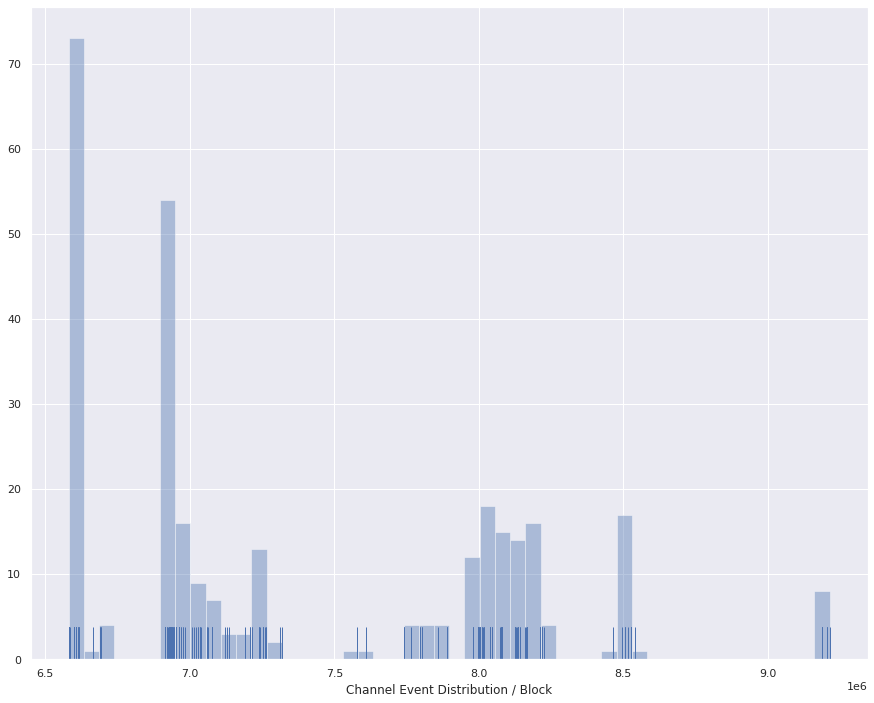

In [50]:
# PRINT HISTORGRAM FOR OPENED CHANNELS

x = df_raiden_all.Block_opened
g = sns.distplot(x, bins=50, kde=False, rug=True, axlabel="Channel Event Distribution / Block");

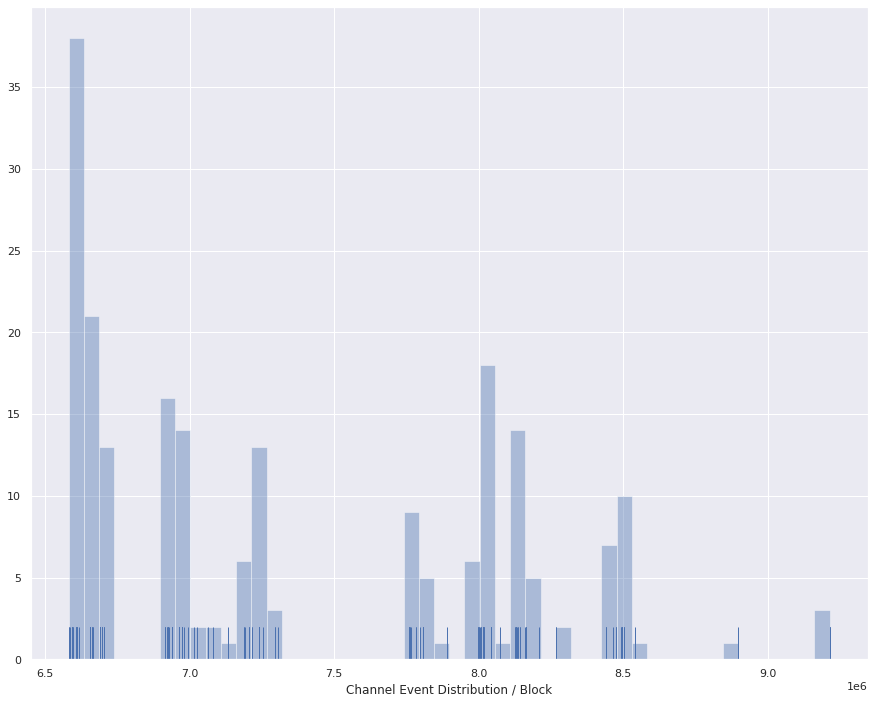

In [51]:
# PRINT HISTORGRAM FOR CLOSED CHANNELS

x = df_raiden_all.Block_closed
g = sns.distplot(x, bins=50, kde=False, rug=True, axlabel="Channel Event Distribution / Block");

In [52]:
# QUERY FOR OPEN BLOCKS

df_raiden_channelsopen = df_raiden_all.query("Channel_open == True")
df_raiden_channelsopen.head(10)
# df_raiden_channelsopen

,Block_opened,Transaction_opened,Channel_Participant_1,Channel_Participant_2,Block_closed,Transaction_closed,Participant_closed,Block_settled,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction_settled,Deposit_Participant_A,Deposit_Participant_B,Channel_Amount,Number_of_Deposits,Channel_open,Channel_Lifetime,Settle_Lifetime
Channel_ID,,,,,,,,,,,,,,,,,,
55,6605491,0x3dda1f2770f3dff96a13ceb72c582aacf51f2f1a031e...,0x49BA4db35Ef1a1fcA7A973993308A8B091C82F98,0xAAAAAA219100005A77eF9dEf76b24dfB2cD6B35e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x49BA4db35Ef1a1fcA7A973993308A8B091C82F98,0x49BA4db35Ef1a1fcA7A973993308A8B091C82F98,1.000000e+02,1.0,True,NaN,NaN
79,6914505,0xa16cd54d31541db61567350c1c9f968d11695303b65f...,0x4972EC8Bb4d53bcE667fDE1E1A585f01772E9Ef2,0xbA5d887bE693F960f8acfc6717495ce0f2334da8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x4972EC8Bb4d53bcE667fDE1E1A585f01772E9Ef2,0xbA5d887bE693F960f8acfc6717495ce0f2334da8,1.000000e+16,2.0,True,NaN,NaN
80,6914514,0x9c7131a7eb5b87bfa75414a93352360a9e143a4fe3eb...,0xbA5d887bE693F960f8acfc6717495ce0f2334da8,0xDFE84e389a21d6ba59F3513597B9229FC43Cf94d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0xDFE84e389a21d6ba59F3513597B9229FC43Cf94d,0xbA5d887bE693F960f8acfc6717495ce0f2334da8,1.000000e+16,2.0,True,NaN,NaN
91,6921019,0x7156c844f7b407dfde6c7ff3fb6c2879b4c05c20cd02...,0x4bFA865BDDB97fDDC871Ab8BdDF390e293ebD015,0xDFE84e389a21d6ba59F3513597B9229FC43Cf94d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x4bFA865BDDB97fDDC871Ab8BdDF390e293ebD015,0x4bFA865BDDB97fDDC871Ab8BdDF390e293ebD015,1.000000e+15,1.0,True,NaN,NaN
104,6932934,0xe47734c43014a667f414673147c1906c7be5cde39844...,0xDe803Aa80a829AC763a9f914e5843F0E442c6C6f,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0xDe803Aa80a829AC763a9f914e5843F0E442c6C6f,0xDe803Aa80a829AC763a9f914e5843F0E442c6C6f,2.000000e+16,1.0,True,NaN,NaN
111,6934536,0x4d1a661e1dd1960f6f63b4d802c42e9dd017b1f4fcf1...,0x06f5140A415f4E3969f7e40daEcCFd0558c9cE26,0xE03E70e33F2AC48ceC3be5C0C7B06a0f25Ad5610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x06f5140A415f4E3969f7e40daEcCFd0558c9cE26,0xE03E70e33F2AC48ceC3be5C0C7B06a0f25Ad5610,2.000000e+15,2.0,True,NaN,NaN
112,6934544,0xb11579c34cc0f4cf7e61c45b4a7da0ce01dca77c0969...,0x06f5140A415f4E3969f7e40daEcCFd0558c9cE26,0xf9ED3cCa3e56A7B72049e6e830C39fd842A2F8e6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x06f5140A415f4E3969f7e40daEcCFd0558c9cE26,0xf9ED3cCa3e56A7B72049e6e830C39fd842A2F8e6,2.000000e+15,2.0,True,NaN,NaN
114,6934567,0x80348ac80cee5d980999c822ebcfcbd20c93c9e6356d...,0x06f5140A415f4E3969f7e40daEcCFd0558c9cE26,0x10F4BC8CD156B4785f8F1f100C53C4cA0181E9b9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x06f5140A415f4E3969f7e40daEcCFd0558c9cE26,0x10F4BC8CD156B4785f8F1f100C53C4cA0181E9b9,2.000000e+15,2.0,True,NaN,NaN
115,6934596,0x5a4a513b0eaea65ccf32894c3e21f3009b032d30d1aa...,0xE03E70e33F2AC48ceC3be5C0C7B06a0f25Ad5610,0xf9ED3cCa3e56A7B72049e6e830C39fd842A2F8e6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0xE03E70e33F2AC48ceC3be5C0C7B06a0f25Ad5610,0xf9ED3cCa3e56A7B72049e6e830C39fd842A2F8e6,2.000000e+15,2.0,True,NaN,NaN


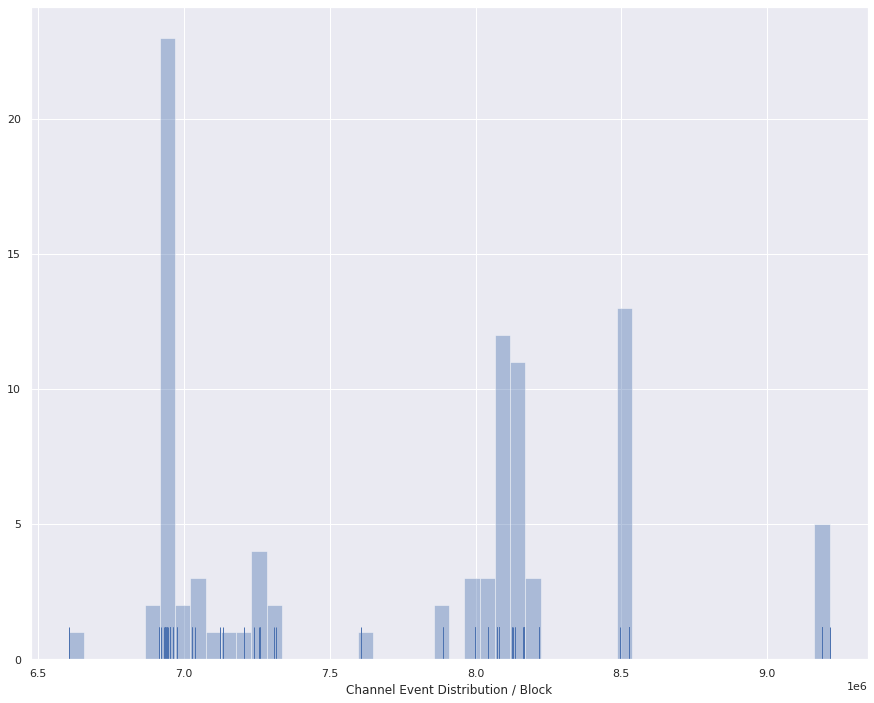

In [53]:
# PRINT HISTORGRAM FOR OPENED CHANNELS STILL OPEN

x = df_raiden_channelsopen.Block_opened
g = sns.distplot(x, bins=50, kde=False, rug=True, axlabel="Channel Event Distribution / Block");

In [54]:
df_raiden_channelsclosed = df_raiden_all.query("Channel_open == False")
df_raiden_channelsclosed.head(10)
# df_raiden_channelsclosed

,Block_opened,Transaction_opened,Channel_Participant_1,Channel_Participant_2,Block_closed,Transaction_closed,Participant_closed,Block_settled,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction_settled,Deposit_Participant_A,Deposit_Participant_B,Channel_Amount,Number_of_Deposits,Channel_open,Channel_Lifetime,Settle_Lifetime
Channel_ID,,,,,,,,,,,,,,,,,,
1,6580846,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593710.0,0xe16a6eef9584de3cdab902899be1fe21af806bfce8b7...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594222.0,1.989000e+16,0.000000e+00,0x52dc88c79ea6fddd907765fae0dfc4e947189c6d6008...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,2.000000e+16,2.0,False,53.600000,2.133333
2,6580854,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583221.0,0x01af2bb2e02892067418b47593a0b5c8fdd724a91932...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6583743.0,1.888989e+16,1.078010e+16,0xd84923345d90eca2eddd0b3d29bdb6edb13547412585...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,3.000000e+16,2.0,False,9.862500,2.175000
3,6581220,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,6581466.0,0x5210489901815d3720fdaf9c7c9e84a7fd12d57df53a...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6581983.0,3.000000e+00,9.000000e+00,0xc512245ccf7b5ed88d534576bd3346711d5ef063cabb...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,2.000000e+01,1.0,False,1.025000,2.154167
4,6581220,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6593711.0,0xd168064268a1f21c33218da62d05f661b9e91e81cb2d...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,6594251.0,5.000000e+15,0.000000e+00,0xa31468bf685360eebe89d47e0c29ad3e20072d9dde8b...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,5.000000e+15,3.0,False,52.045833,2.250000
5,6581220,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6595266.0,0x88bb1c14bf9c5f5375747a8a91e7bccd7fe71335a433...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6598516.0,2.000000e+01,1.000000e+15,0x84e4099fe6b3b38a8f00dfe3d2bc582bd7b2852f2d54...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,1.000000e+15,2.0,False,58.525000,13.541667
6,6581597,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6584834.0,0xf58a177d666ba9a48a1bada69a6d4bd6239b117a12a3...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,6586554.0,0.000000e+00,5.000000e+16,0x83ef306bbd0c21e6a98135df35f4255c484280eae75c...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,5.000000e+16,1.0,False,13.487500,7.166667
7,6581606,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,6593708.0,0x317558245613a1478c83be0d1cc27936acb7d225534a...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594222.0,1.000000e+15,0.000000e+00,0xf10d269c20023e5ae968a91eca082a05aa1f3ab2d61d...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,1.000000e+15,1.0,False,50.425000,2.141667
8,6581624,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,6593710.0,0x4a2186fe6b873aacb2ef94452e8ad323cc7e13691bcd...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,6594243.0,1.000000e+15,1.000000e+14,0xbcace76488f3d307bb383a069c607e58311e8a3dc8bb...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b7

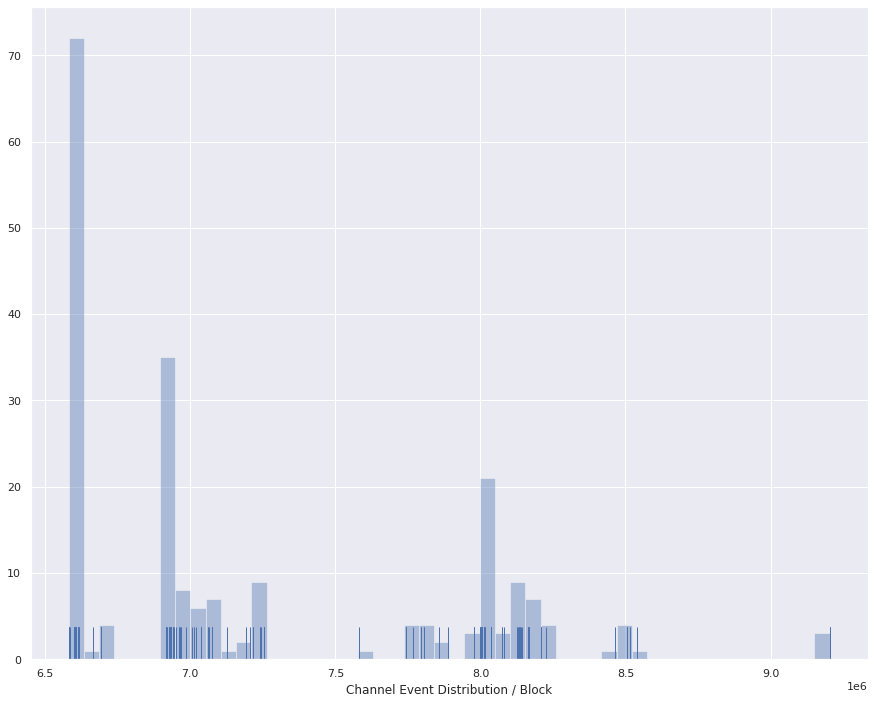

In [55]:
# PRINT HISTORGRAM FOR OPENED CHANNELS ALREADY CLOSED

x = df_raiden_channelsclosed.Block_opened
g = sns.distplot(x, bins=50, kde=False, rug=True, axlabel="Channel Event Distribution / Block");

In [56]:
# PREPARE NETWORK VISUALIZATION FOR OPEN NETWORK

raiden_net = Network(height="1000px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
raiden_net.barnes_hut()
raiden_data = df_raiden_channelfocus.query("Channel_open == True")

sources = raiden_data["Channel_Participant_1"]
targets = raiden_data["Channel_Participant_2"]
weights = raiden_data["Channel_Amount"]
weights = weights.fillna(0, inplace=False)

In [57]:
# DRAW NETWORK  VISUALIZATION FOR OPEN NETWORK

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    raiden_net.add_node(src, src, title=src)
    raiden_net.add_node(dst, dst, title=dst)
    raiden_net.add_edge(src, dst, value=w)

neighbor_map = raiden_net.get_adj_list()

# add neighbor data to node hover data
for node in raiden_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

raiden_net.show("raiden_open_network.html")

In [58]:
# PREPARE NETWORK VISUALIZATION FOR ALL-TIME NETWORK

raiden_net = Network(height="1000px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
raiden_net.barnes_hut()
raiden_data = df_raiden_channelfocus

sources = raiden_data["Channel_Participant_1"]
targets = raiden_data["Channel_Participant_2"]
weights = raiden_data["Channel_Amount"]
weights = weights.fillna(0, inplace=False)

In [59]:
# DRAW NETWORK VISUALIZATION FOR ALL-TIME NETWORK

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    raiden_net.add_node(src, src, title=src)
    raiden_net.add_node(dst, dst, title=dst)
    raiden_net.add_edge(src, dst, value=w)

neighbor_map = raiden_net.get_adj_list()

# add neighbor data to node hover data
for node in raiden_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

raiden_net.show("raiden_all_time_opened.html")

In [60]:
# SET INDEX ON BLOCK ACTION

df_raiden_events_opened = df_raiden_opened.set_index('Block_opened')
df_raiden_events_opened.head(10)
# df_raiden_events_opened

,Transaction_opened,Channel_Participant_1,Channel_Participant_2
Block_opened,,,
6580846,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36
6580854,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253
6581220,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253
6581220,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36
6581220,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF
6581597,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118
6581606,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118
6581624,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF
6581624,0x5dbb495720a8f9b979f256ad367fe38636ff1325ced5...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253


In [61]:
# SET INDEX ON BLOCK ACTION

df_raiden_events_closed = df_raiden_closed.set_index('Block_closed')
df_raiden_events_closed.head(10)
# df_raiden_events_closed

,Transaction_closed,Participant_closed
Block_closed,,
6581466,0x5210489901815d3720fdaf9c7c9e84a7fd12d57df53a...,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118
6583221,0x01af2bb2e02892067418b47593a0b5c8fdd724a91932...,0xf2fBCC167cc3f24a620798E27b4BB084dD275253
6584834,0xf58a177d666ba9a48a1bada69a6d4bd6239b117a12a3...,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617
6593708,0x317558245613a1478c83be0d1cc27936acb7d225534a...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1
6593710,0xe16a6eef9584de3cdab902899be1fe21af806bfce8b7...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36
6593710,0x4a2186fe6b873aacb2ef94452e8ad323cc7e13691bcd...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1
6593711,0xd168064268a1f21c33218da62d05f661b9e91e81cb2d...,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36
6593711,0x5cd2466a698f78150336f570d5b026cbc211792b4fff...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1
6593713,0x0e5b85385554df5bbddfadc996a0b51a41547828c159...,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1


In [62]:
# SORT ON BLOCK ACTION

df_raiden_events = df_raiden_events_opened.append(df_raiden_events_closed, sort=True)
df_raiden_events.head(10)
# df_raiden_events

,Channel_Participant_1,Channel_Participant_2,Participant_closed,Transaction_closed,Transaction_opened
6580846,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN,NaN,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...
6580854,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN,NaN,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN,NaN,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN,NaN,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,NaN,NaN,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...
6581597,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,NaN,NaN,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...
6581606,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,NaN,NaN,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...
6581624,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,NaN,NaN,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...
6581624,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN,NaN,0x5dbb495720a8f9b979f256ad367fe38636ff1325ced5...
6581936,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,NaN,NaN,0x09ef89acee4a05adead1df0f0288b19b3009e8e7c70c...


In [63]:
# SET TX OPENED + CLOSED VIA ISNA TO BOOLEAN

df_raiden_events["BOOL_opened"] = df_raiden_events.Transaction_opened.notna()
df_raiden_events["BOOL_closed"] = df_raiden_events.Transaction_closed.notna()
df_raiden_events.head(10)
# df_raiden_events

,Channel_Participant_1,Channel_Participant_2,Participant_closed,Transaction_closed,Transaction_opened,BOOL_opened,BOOL_closed
6580846,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN,NaN,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,True,False
6580854,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN,NaN,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,True,False
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN,NaN,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,True,False
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN,NaN,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,True,False
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,NaN,NaN,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,True,False
6581597,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,NaN,NaN,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...,True,False
6581606,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,NaN,NaN,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...,True,False
6581624,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,NaN,NaN,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...,True,False
6581624,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN,NaN,0x5dbb495720a8f9b979f256ad367fe38636ff1325ced5...,True,False
6581936,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,NaN,NaN,0x09ef89acee4a05adead1df0f0288b19b3009e8e7c70c...,True,False


In [64]:
# DROP EXCESS TXS

df_raiden_events["Block_Number"] = df_raiden_events.index
df_raiden_events = df_raiden_events.sort_index(axis = "index")
df_raiden_events.head()
# df_raiden_events

,Channel_Participant_1,Channel_Participant_2,Participant_closed,Transaction_closed,Transaction_opened,BOOL_opened,BOOL_closed,Block_Number
6580846,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN,NaN,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,True,False,6580846
6580854,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN,NaN,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,True,False,6580854
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN,NaN,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,True,False,6581220
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN,NaN,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,True,False,6581220
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,NaN,NaN,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,True,False,6581220


In [65]:
# CUMULATE ALL BOOLEAN EVENTS

df_raiden_events["cumsum_opened"] = df_raiden_events["BOOL_opened"].cumsum(axis="index")
df_raiden_events["cumsum_closed"] = df_raiden_events["BOOL_closed"].cumsum(axis="index")
df_raiden_events["cumsum_diff"] = df_raiden_events["cumsum_opened"] - df_raiden_events["cumsum_closed"]
df_raiden_events.head(10)
# df_raiden_events

,Channel_Participant_1,Channel_Participant_2,Participant_closed,Transaction_closed,Transaction_opened,BOOL_opened,BOOL_closed,Block_Number,cumsum_opened,cumsum_closed,cumsum_diff
6580846,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN,NaN,0x05de7b75f93959847ab84dd647b9e88ce302d18bd57f...,True,False,6580846,1,0,1
6580854,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN,NaN,0x265f7b13b456472f6c57f3a6c72043366d7f9129dd7e...,True,False,6580854,2,0,2
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN,NaN,0x1724ca71c7851ab968738cf3e4247633ba73cfa21fb6...,True,False,6581220,3,0,3
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0xf1e4b4782BB6cd56a1feB9cDA58C167bb5669F36,NaN,NaN,0x8bbd305a5e5c3444d62a39e8e2765c37816562b0c335...,True,False,6581220,4,0,4
6581220,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,NaN,NaN,0x04850c26aeb542bc7ceab148d3bd074254cb446ad838...,True,False,6581220,5,0,5
6581466,NaN,NaN,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,0x5210489901815d3720fdaf9c7c9e84a7fd12d57df53a...,NaN,False,True,6581466,5,1,4
6581597,0x2CB3e01a636a3Bfc5727718dd9e1ABCdfaE6a617,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,NaN,NaN,0xecaa42d226e3fb1ec3b0f6618b567f9a00a8469cfbad...,True,False,6581597,6,1,5
6581606,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xD6e68536eCe0Eac02b39317FdCE814087Bae6118,NaN,NaN,0x19282229f69a5cd9b5a95b0fb13bc08989f8403e2b98...,True,False,6581606,7,1,6
6581624,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0x28898A6b762d9c400FF900EFF66F2885F0B28FAF,NaN,NaN,0xed8c42865c32e6f2cb29f84c3b480faefc4dffd92e2c...,True,False,6581624,8,1,7
6581624,0x0e5215997B8232ace7cC0DEb04dFeB60a4C0beB1,0xf2fBCC167cc3f24a620798E27b4BB084dD275253,NaN,NaN,0x5dbb495720a8f9b979f256ad367fe38636ff1325ced5...,True,False,6581624,9,1,8


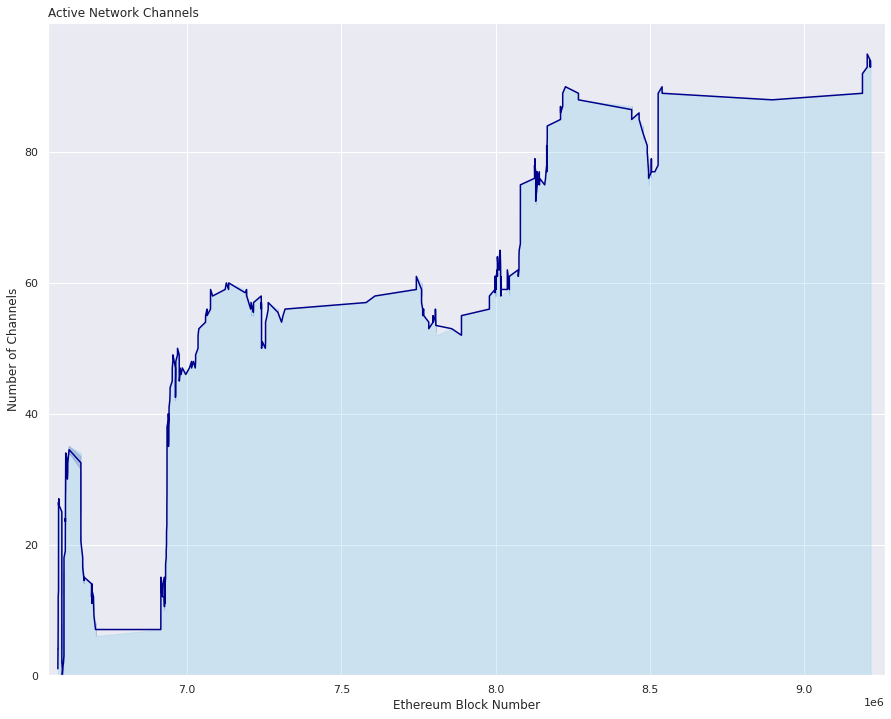

In [66]:
# CREATE GRAPH FOR ACTIVE NETWORK SIZE
g = sns.lineplot(x="Block_Number", y="cumsum_diff", markers=True, dashes=False, data=df_raiden_events, color="darkblue")

plt.title("Active Network Channels", loc="left")
plt.xlabel("Ethereum Block Number")
plt.xlim(df_raiden_events["Block_Number"].min()*0.995, df_raiden_events["Block_Number"].max()*1.005)
plt.ylim(0, df_raiden_events["cumsum_diff"].max()*1.05)
plt.ylabel("Number of Channels")
plt.fill_between(df_raiden_events["Block_Number"], df_raiden_events["cumsum_diff"], color="skyblue", alpha=0.3)

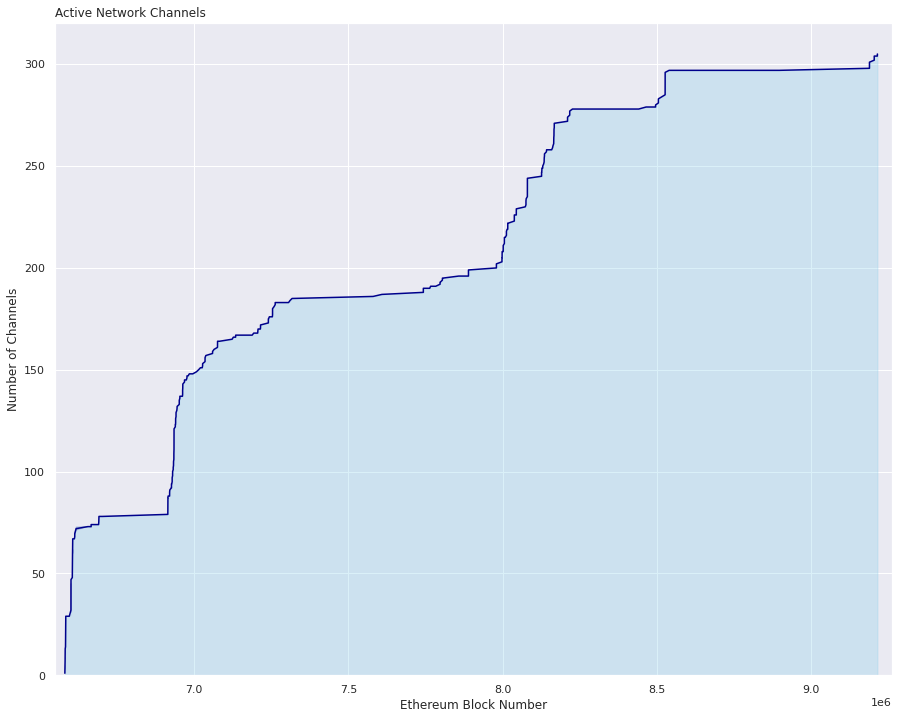

In [67]:
# CREATE GRAPH FOR ALL-TIME NETWORK SIZE
g = sns.lineplot(x="Block_Number", y="cumsum_opened", markers=True, dashes=False, data=df_raiden_events, color="darkblue")

plt.title("Active Network Channels", loc="left")
plt.xlabel("Ethereum Block Number")
plt.xlim(df_raiden_events["Block_Number"].min()*0.995, df_raiden_events["Block_Number"].max()*1.005)
plt.ylim(0, df_raiden_events["cumsum_opened"].max()*1.05)
plt.ylabel("Number of Channels")
plt.fill_between(df_raiden_events["Block_Number"], df_raiden_events["cumsum_opened"], color="skyblue", alpha=0.3)

In [68]:
# CREATE CUMULATIVE CHANNEL AMOUNT

df_raiden_network_sum_temp = df_raiden_all[["Block_opened", "Block_settled", "Participant_1_Settle_Amount", "Participant_2_Settle_Amount", "Channel_Amount"]]
df_raiden_network_sum_temp["Block_settled"].fillna(0, inplace=True)
df_raiden_network_sum_temp = df_raiden_network_sum_temp.astype({"Block_settled": "int64"})
df_raiden_network_sum_temp.head(10)

/home/winterc/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Block_opened,Block_settled,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Channel_Amount
Channel_ID,,,,,
1,6580846,6594222,1.989000e+16,0.000000e+00,2.000000e+16
2,6580854,6583743,1.888989e+16,1.078010e+16,3.000000e+16
3,6581220,6581983,3.000000e+00,9.000000e+00,2.000000e+01
4,6581220,6594251,5.000000e+15,0.000000e+00,5.000000e+15
5,6581220,6598516,2.000000e+01,1.000000e+15,1.000000e+15
6,6581597,6586554,0.000000e+00,5.000000e+16,5.000000e+16
7,6581606,6594222,1.000000e+15,0.000000e+00,1.000000e+15
8,6581624,6594243,1.000000e+15,1.000000e+14,1.100000e+15
9,6581624,6594251,1.000000e+15,2.000000e+14,1.200000e+15


In [69]:
# SPLIT SERIES FOR OPEN AMOUNTS

s_raiden_network_sum_pos = pd.Series(df_raiden_network_sum_temp["Channel_Amount"].values, index=df_raiden_network_sum_temp['Block_opened'])
s_raiden_network_sum_pos.sort_index(inplace=True)
s_raiden_network_sum_pos.dropna(inplace=True)
s_raiden_network_sum_pos.head(10)

Block_opened
6580846    2.000000e+16
6580854    3.000000e+16
6581220    2.000000e+01
6581220    5.000000e+15
6581220    1.000000e+15
6581597    5.000000e+16
6581606    1.000000e+15
6581624    1.100000e+15
6581624    1.200000e+15
6581936    5.001000e+16
dtype: float64

In [70]:
# SPLIT SERIES FOR SETTLE AMOUNTS

s_raiden_network_sum_neg = pd.Series(-((df_raiden_network_sum_temp["Participant_1_Settle_Amount"].values)+(df_raiden_network_sum_temp["Participant_2_Settle_Amount"].values)), index=df_raiden_network_sum_temp['Block_settled'])
s_raiden_network_sum_neg.sort_index(inplace=True)
s_raiden_network_sum_neg.dropna(inplace=True)
s_raiden_network_sum_neg.head(10)

Block_settled
6581983   -1.200000e+01
6583743   -2.966999e+16
6586554   -5.000000e+16
6594222   -1.989000e+16
6594222   -1.000000e+15
6594243   -7.500000e+15
6594243   -7.500000e+15
6594243   -1.100000e+15
6594243   -7.500000e+15
6594243   -7.500000e+15
dtype: float64

In [71]:
# MERGE SERIES FOR NETWORK CAPACITY

s_raiden_network_sum = s_raiden_network_sum_pos.append(s_raiden_network_sum_neg)
s_raiden_network_sum.sort_index(inplace=True)
s_raiden_network_sum.head(15)

6580846    2.000000e+16
6580854    3.000000e+16
6581220    2.000000e+01
6581220    5.000000e+15
6581220    1.000000e+15
6581597    5.000000e+16
6581606    1.000000e+15
6581624    1.100000e+15
6581624    1.200000e+15
6581936    5.001000e+16
6581956    1.000000e+15
6581956    1.000000e+15
6581983   -1.200000e+01
6582992    7.500000e+15
6583025    7.500000e+15
dtype: float64

In [72]:
# CALCULATE CUMULATIVE NETWORK CAPACITY

s_raiden_network_sum = s_raiden_network_sum.cumsum()
s_raiden_network_sum.head(15)

6580846    2.000000e+16
6580854    5.000000e+16
6581220    5.000000e+16
6581220    5.500000e+16
6581220    5.600000e+16
6581597    1.060000e+17
6581606    1.070000e+17
6581624    1.081000e+17
6581624    1.093000e+17
6581936    1.593100e+17
6581956    1.603100e+17
6581956    1.613100e+17
6581983    1.613100e+17
6582992    1.688100e+17
6583025    1.763100e+17
dtype: float64

In [73]:
# MOVE SERIES INTO DATAFRAME

tempframe = {'Block_Number': s_raiden_network_sum.index, 'Network_Sum': s_raiden_network_sum } 
df_raiden_network_sum = pd.DataFrame(tempframe) 
df_raiden_network_sum.head(15)

,Block_Number,Network_Sum
6580846,6580846,2.000000e+16
6580854,6580854,5.000000e+16
6581220,6581220,5.000000e+16
6581220,6581220,5.500000e+16
6581220,6581220,5.600000e+16
6581597,6581597,1.060000e+17
6581606,6581606,1.070000e+17
6581624,6581624,1.081000e+17
6581624,6581624,1.093000e+17
6581936,6581936,1.593100e+17


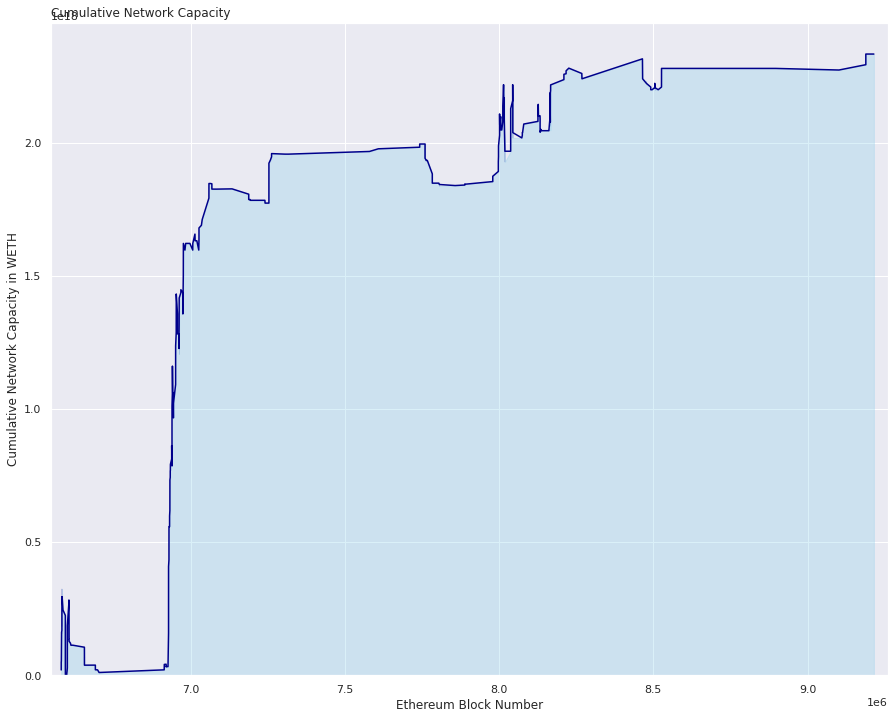

In [74]:
# CREATE GRAPH FOR NETWORK CAPACITY

g = sns.lineplot(x="Block_Number", y="Network_Sum", markers=True, dashes=False, data=df_raiden_network_sum, color="darkblue")

plt.title("Cumulative Network Capacity", loc="left")
plt.xlabel("Ethereum Block Number")
plt.xlim(df_raiden_network_sum["Block_Number"].min()*0.995, df_raiden_network_sum["Block_Number"].max()*1.005)
plt.ylim(0, df_raiden_network_sum["Network_Sum"].max()*1.05)
plt.ylabel("Cumulative Network Capacity in WETH")
plt.fill_between(df_raiden_network_sum["Block_Number"], df_raiden_network_sum["Network_Sum"], color="skyblue", alpha=0.3)

In [75]:
# PREPARE CUMULATIVE SETTLE AMOUNT

df_raiden_settled_sum = df_raiden_settled
df_raiden_settled_sum["Sum_settled"] = df_raiden_settled_sum["Participant_1_Settle_Amount"] + df_raiden_settled_sum["Participant_2_Settle_Amount"]
df_raiden_settled_sum["Block_Number"] = df_raiden_settled_sum["Block_settled"]

In [76]:
# CALCULATE CUMULATIVE SETTLE AMOUNT

# df_raiden_settled_sum = df_raiden_settled_sum.set_index("Block_Number")
df_raiden_settled_sum["Sum_settled"] = df_raiden_settled_sum["Sum_settled"].cumsum(axis="index")
df_raiden_settled_sum.head(10)

,Block_settled,Participant_1_Settle_Amount,Participant_2_Settle_Amount,Transaction_settled,Sum_settled,Block_Number
Channel_ID,,,,,,
3,6581983,3.000000e+00,9.000000e+00,0xc512245ccf7b5ed88d534576bd3346711d5ef063cabb...,1.200000e+01,6581983
2,6583743,1.888989e+16,1.078010e+16,0xd84923345d90eca2eddd0b3d29bdb6edb13547412585...,2.966999e+16,6583743
6,6586554,0.000000e+00,5.000000e+16,0x83ef306bbd0c21e6a98135df35f4255c484280eae75c...,7.966999e+16,6586554
7,6594222,1.000000e+15,0.000000e+00,0xf10d269c20023e5ae968a91eca082a05aa1f3ab2d61d...,8.066999e+16,6594222
1,6594222,1.989000e+16,0.000000e+00,0x52dc88c79ea6fddd907765fae0dfc4e947189c6d6008...,1.005600e+17,6594222
14,6594243,7.500000e+15,0.000000e+00,0x7ee5b123dad71e663527256673c9d752b4373f24f765...,1.080600e+17,6594243
17,6594243,7.500000e+15,0.000000e+00,0x5567d91018853e7a037fbf068b5ba1bb57074a293cc0...,1.155600e+17,6594243
19,6594243,7.500000e+15,0.000000e+00,0x494c23e804059c4e529500e62d6be8d31698c6fa5eaf...,1.230600e+17,6594243
27,6594243,7.500000e+15,0.000000e+00,0x3009a8aab1cb63a963c7a640adf2942cf8985e18468a...,1.305600e+17,6594243


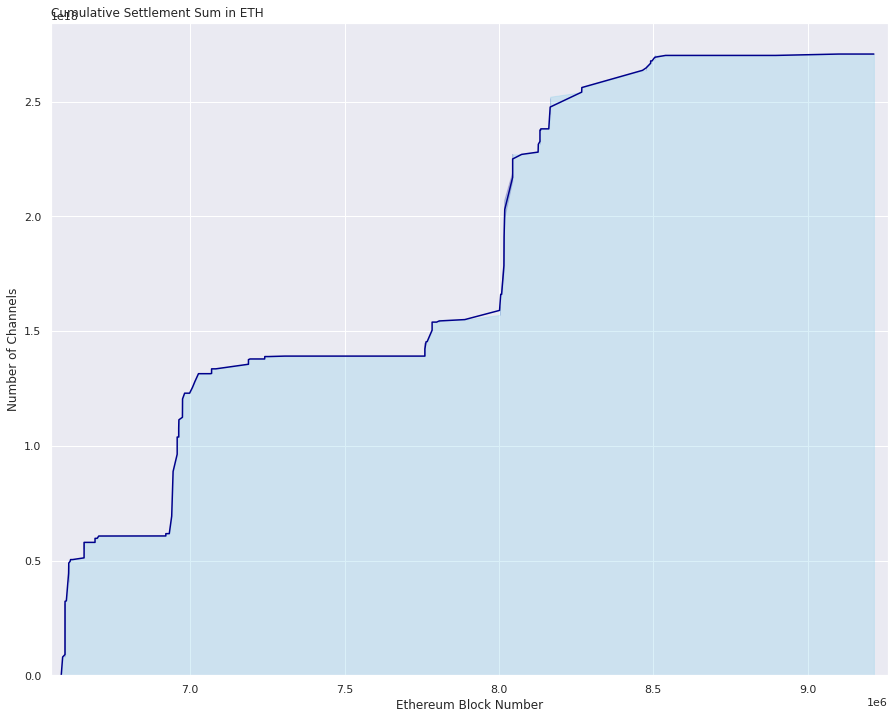

In [77]:
# CREATE GRAPH FOR CUMULATIVE SETTLE AMOUNT

g = sns.lineplot(x="Block_settled", y="Sum_settled", markers=True, dashes=False, data=df_raiden_settled_sum, color="darkblue")

plt.title("Cumulative Settlement Sum in ETH", loc="left")
plt.xlabel("Ethereum Block Number")
plt.xlim(df_raiden_settled_sum["Block_settled"].min()*0.995, df_raiden_settled_sum["Block_settled"].max()*1.005)
plt.ylim(0, df_raiden_settled_sum["Sum_settled"].max()*1.05)
plt.ylabel("Number of Channels")
plt.fill_between(df_raiden_settled_sum["Block_settled"], df_raiden_settled_sum["Sum_settled"], color="skyblue", alpha=0.3)